## Name : Prewitt Gomes 
## Roll No. : 22
## EXP 6 : Classification of Credit Card Default Risk using Support Vector Machine

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score

In [22]:
#load data set
data = pd.read_csv("credit.csv", skiprows=1)
data = data.sample(5000, random_state=12)

print(data.columns)

data.drop(columns=['ID'], inplace=True)
print(data.columns)

Index(['ID', 'LIMIT_BAL', 'GENDER', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')
Index(['LIMIT_BAL', 'GENDER', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')


In [23]:
print(data.info())
print(data.describe())
print(data.shape)
print(data.tail())
print(data.head())
print(data.dtypes)

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 14944 to 13714
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   5000 non-null   int64
 1   GENDER                      5000 non-null   int64
 2   EDUCATION                   5000 non-null   int64
 3   MARRIAGE                    5000 non-null   int64
 4   AGE                         5000 non-null   int64
 5   PAY_0                       5000 non-null   int64
 6   PAY_2                       5000 non-null   int64
 7   PAY_3                       5000 non-null   int64
 8   PAY_4                       5000 non-null   int64
 9   PAY_5                       5000 non-null   int64
 10  PAY_6                       5000 non-null   int64
 11  BILL_AMT1                   5000 non-null   int64
 12  BILL_AMT2                   5000 non-null   int64
 13  BILL_AMT3                   5000 non-null   int64
 14  BILL_AMT

In [24]:
#target column default payment(0)
y=data['default payment next month']

#select only two features for visualization
x=data[['BILL_AMT1', 'BILL_AMT2',]]
print(x.dtypes)
print(x.head())

BILL_AMT1    int64
BILL_AMT2    int64
dtype: object
       BILL_AMT1  BILL_AMT2
14944       3690      15618
14929          0          0
10895     497106     497921
12838       6349        668
11789        360          0


In [25]:
#train test split 
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=42
)
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [26]:
from sklearn.svm import SVC

models = {
    "Linear SVM": SVC(kernel='linear', C=1, class_weight='balanced'),
   
    "Polynomial SVM": SVC(kernel='poly',
                          degree=2,
                          C=1,
                          gamma='scale',
                          class_weight='balanced'),
   
    "RBF SVM": SVC(kernel='rbf',
                   C=5,
                   gamma=0.1,
                   class_weight='balanced')
}

for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    print("\n", name)
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred, zero_division=0))
    print("Recall:\n", recall_score(y_test, y_pred))
    print("Accuray: ", accuracy_score(y_test, y_pred))
    print("F1 score: ", f1_score(y_test, y_pred))


 Linear SVM
Confusion Matrix:
 [[ 123 1016]
 [  34  327]]
Precision: 0.24348473566641846
Recall:
 0.9058171745152355
Accuray:  0.3
F1 score:  0.38380281690140844

 Polynomial SVM
Confusion Matrix:
 [[  13 1126]
 [   3  358]]
Precision: 0.24123989218328842
Recall:
 0.9916897506925207
Accuray:  0.24733333333333332
F1 score:  0.3880758807588076

 RBF SVM
Confusion Matrix:
 [[223 916]
 [ 62 299]]
Precision: 0.24609053497942388
Recall:
 0.8282548476454293
Accuray:  0.348
F1 score:  0.37944162436548223


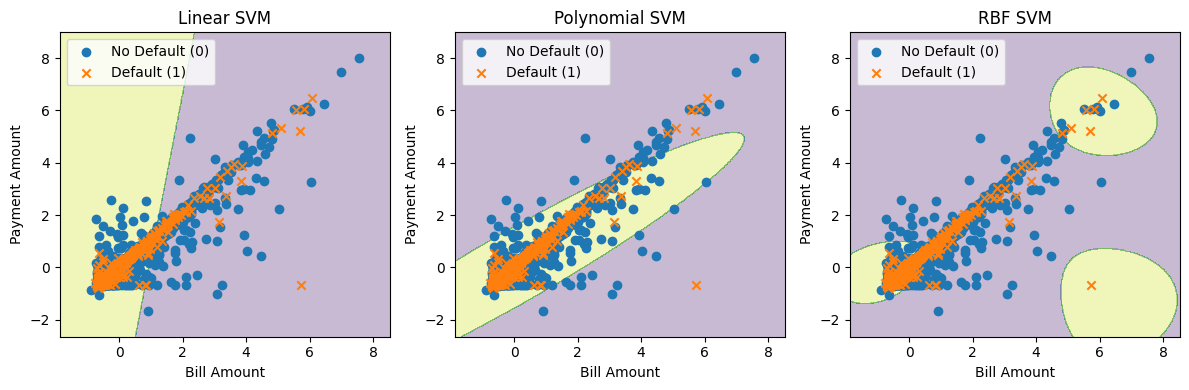

In [27]:
# --- Decision Boundary Plotting Function ---
def plot_boundary(model, title):
    h = 0.02
    x_min, x_max = x_train[:, 0].min() - 1, x_train[:, 0].max() + 1
    y_min, y_max = x_train[:, 1].min() - 1, x_train[:, 1].max() + 1
   
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, h),
        np.arange(y_min, y_max, h)
    )
   
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
   
    plt.contourf(xx, yy, Z, alpha=0.3)
   
    # Class 0
    plt.scatter(x_train[y_train == 0, 0],
                x_train[y_train == 0, 1],
                label='No Default (0)',
                marker='o')
   
    # Class 1
    plt.scatter(x_train[y_train == 1, 0],
                x_train[y_train == 1, 1],
                label='Default (1)',
                marker='x')
   
    plt.legend()
    plt.title(title)
    plt.xlabel("Bill Amount")
    plt.ylabel("Payment Amount")

# --- Model Training and Execution ---
plt.figure(figsize=(12, 4))

for i, (name, model) in enumerate (models.items()):
    plt.subplot(1,3,i+1)
    model.fit(x_train, y_train)
    plot_boundary(model,name)

plt.tight_layout()
plt.show()